In [1]:
                                                                                                                                                                                                                                                    """
%load_ext autoreload
%autoreload 2
"""
from NPw_aux import prepare_ion_data
import warnings
import os
warnings.filterwarnings("ignore")
import logging
datapath = os.environ.get("DATA_PATH")
if datapath == None:
    raise KeyError("Enviromental variable data path has to be declared")
print(datapath)
from datetime import datetime, timedelta
freq = timedelta(minutes=30)
logging.disable(logging.CRITICAL)

/home/carloscano/data/


In [2]:
#df_GNSSTEC,df_covariate, df_eq = prepare_ion_data(datapath, "GRK", freq)

In [3]:
#df_GNSSTEC.to_pickle("df_GNSSTEC.pkl")
#df_covariate.to_pickle("df_covariate.pkl")
#df_eq.to_pickle("df_eq.pkl")

In [4]:
import pandas as pd
df_GNSSTEC = pd.read_pickle("df_GNSSTEC.pkl")
df_covariate = pd.read_pickle("df_covariate.pkl")
df_eq = pd.read_pickle("df_eq.pkl")

In [5]:
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd

import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dataclasses import dataclass, asdict
from dateutil.relativedelta import *

import ast

import sys
import dateutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import TCNModel, RNNModel
from darts.dataprocessing.transformers import Scaler,MissingValuesFiller
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, r2_score
from darts.utils.missing_values import fill_missing_values
from darts.datasets import AirPassengersDataset, SunspotsDataset, EnergyDataset

from NPw import NPw

import pandas as pd

from darts.models import TCNModel
import darts.utils.timeseries_generation as tg
from darts.utils.likelihood_models import GaussianLikelihood
from darts.datasets import EnergyDataset
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from NPw_aux import prepare_EQ, ConfigEQ


In [6]:

ConfigEQ_d = {
    "dist_start": 1000,
    "dist_delta": 3000,
    "mag_start": 4.5,
    "mag_delta": 2,
    "filter": True,
    "drop": ["arc_cos", "arc_sin"],
}
config_events = ConfigEQ(**ConfigEQ_d)

df_regressor = df_GNSSTEC.reset_index()
df_other = df_covariate
df_events = prepare_EQ(df_eq, config_events)    
 
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=5)
training_lenght = timedelta(days=30)

In [7]:
from darts import TimeSeries

In [8]:
from DartsFCeV import NLinearDartsFCeVConfig,TransformerDartsFCeVConfig, DartsFCeVConfig,NHITSDartsFCeVConfig, NBEATSDartsFCeVConfig,RNNDartsFCeVConfig,TCNDartsFCeVConfig, TFTDartsFCeVConfig

from FCeV import FCeV, FCeVConfig

TCN_darts_FCeV_config = {
"dilation_base": 2,
"weight_norm": True,
"kernel_size": 16,
"num_filter": 10}


RNN_darts_FCeV_config = {
"hidden_dim": 16,
"n_rnn_layers": 10}

NBEATS_darts_FCeV_config = {
"num_stacks": 10,
"num_layers": 10,
"num_blocks": 10,
"layer_widths": 10,
"expansion_coefficient_dim": 10}
Transformer_darts_FCeV_config = {
"d_model": 12,
"nhead": 4,
"num_encoder_layers": 3,
"num_decoder_layers": 3,
"dim_feedforward": 512}


NHITS_darts_FCeV_config = {
"num_stacks": 10,
"num_layers": 10,
"num_blocks": 10,
"layer_widths": 10,
"expansion_coefficient_dim": 10,
"max_pool_1d": True}

TFT_darts_FCeV_config = {
    "lstm_layers" : 2,
    "hidden_size" : 64,
    "num_attention_heads" : 4,
    "full_attention" : False,
    "add_relative_index": False,
    "hidden_continuous_size" : 8,
}
NLinear_darts_FCeV_config = {
"const_init": True,
}
TCN_darts_FCeV_config = TCNDartsFCeVConfig(**TCN_darts_FCeV_config)

TFT_darts_FCeV_config = TFTDartsFCeVConfig(**TFT_darts_FCeV_config)

RNN_darts_FCeV_config = RNNDartsFCeVConfig(**RNN_darts_FCeV_config)

NBEATS_darts_FCeV_config = NBEATSDartsFCeVConfig(**NBEATS_darts_FCeV_config)

NHITS_darts_FCeV_config = NHITSDartsFCeVConfig(**NHITS_darts_FCeV_config)

Transformer_darts_FCeV_config = TransformerDartsFCeVConfig(**Transformer_darts_FCeV_config)

NLinear_darts_FCeV_config = NLinearDartsFCeVConfig(**NLinear_darts_FCeV_config)


darts_FCev_config = {
    "DartsModelConfig": TFT_darts_FCeV_config,
    "dropout":0.1,
    "n_epochs":200,
    "batch_size":300 ,
    "learning_rate": 1e-3,
    "use_gpu": True,
    "event_type": "Non-Binary",
    "patience":40,
    "seed": 1234567,
    "probabilistic": True
}
darts_FCeV_config = DartsFCeVConfig(**darts_FCev_config)
%load_ext autoreload
%autoreload 2

In [9]:
train_day = datetime.fromisoformat("2018-10-01T00:00:00")
val_day = datetime.fromisoformat("2019-01-01T00:00:00")
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=10)
training_lenght = timedelta(days=150)
freq = pd.Timedelta(minutes=30)

FCev_config = {
    "freq": freq,
    "forecast_length": forecast_length,
    "question_mark_length": question_mark_length,
    "training_length": training_lenght,
    "verbose": True,
    "input_length": historic_lenght
}


FCev_config = FCeVConfig(**FCev_config)

In [10]:
synthetic_events = pd.read_pickle("synthetic.pkl")
df_synth = prepare_EQ(synthetic_events, config_events)  
output_path = "results/"
current_fcev = FCeV(FCev_config, darts_FCeV_config, df_GNSSTEC, df_covariate,df_events,  output_path, df_synth)

In [11]:
current_fcev.create_iteration(training_lenght + pd.Timedelta(hours=10), 30)
current_fcev.iterations
from darts import TimeSeries

1826 days 23:30:00 __ 1 days 00:00:00


In [ ]:
iteration = 21
df_fore = current_fcev.process_iteration(iteration)

2016-06-18 10:00:00


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
real = current_fcev.FCeV_model.input_series

In [ ]:
iterations = current_fcev.iterations

In [ ]:
values = current_fcev.FCeV_model.model.predict(n=48, num_samples=1000).plot()


In [16]:
day = iterations.iloc[iteration].end_date

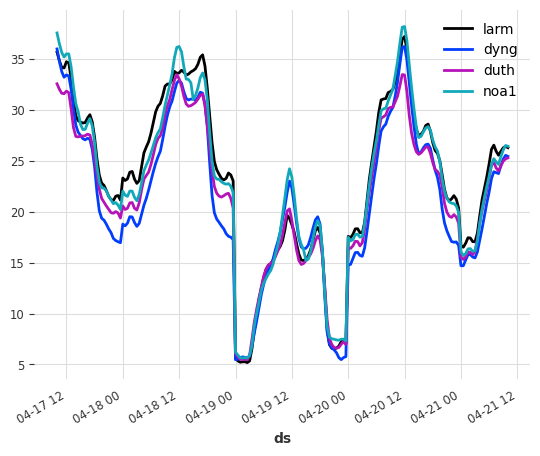

In [17]:
real.slice(day - pd.Timedelta(days = 4), day).plot()

In [94]:
main_df = df_fore["SYNTH_0"]["8"]

In [95]:
main_df.stack(level=1).reset_index(1).columns

Index(['component', 'current', 'pred', 'uncer'], dtype='object')

In [96]:
second_df= main_df.stack(level=1).reset_index(1)

In [97]:
second_df["uncer_min"] = second_df['pred'] - second_df['uncer']
second_df["uncer_max"] = second_df['pred'] + second_df['uncer']

In [98]:
result = pd.melt(main_df.reset_index(), id_vars= ["ds", )

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-98-6c2b0878c67b>, line 1)

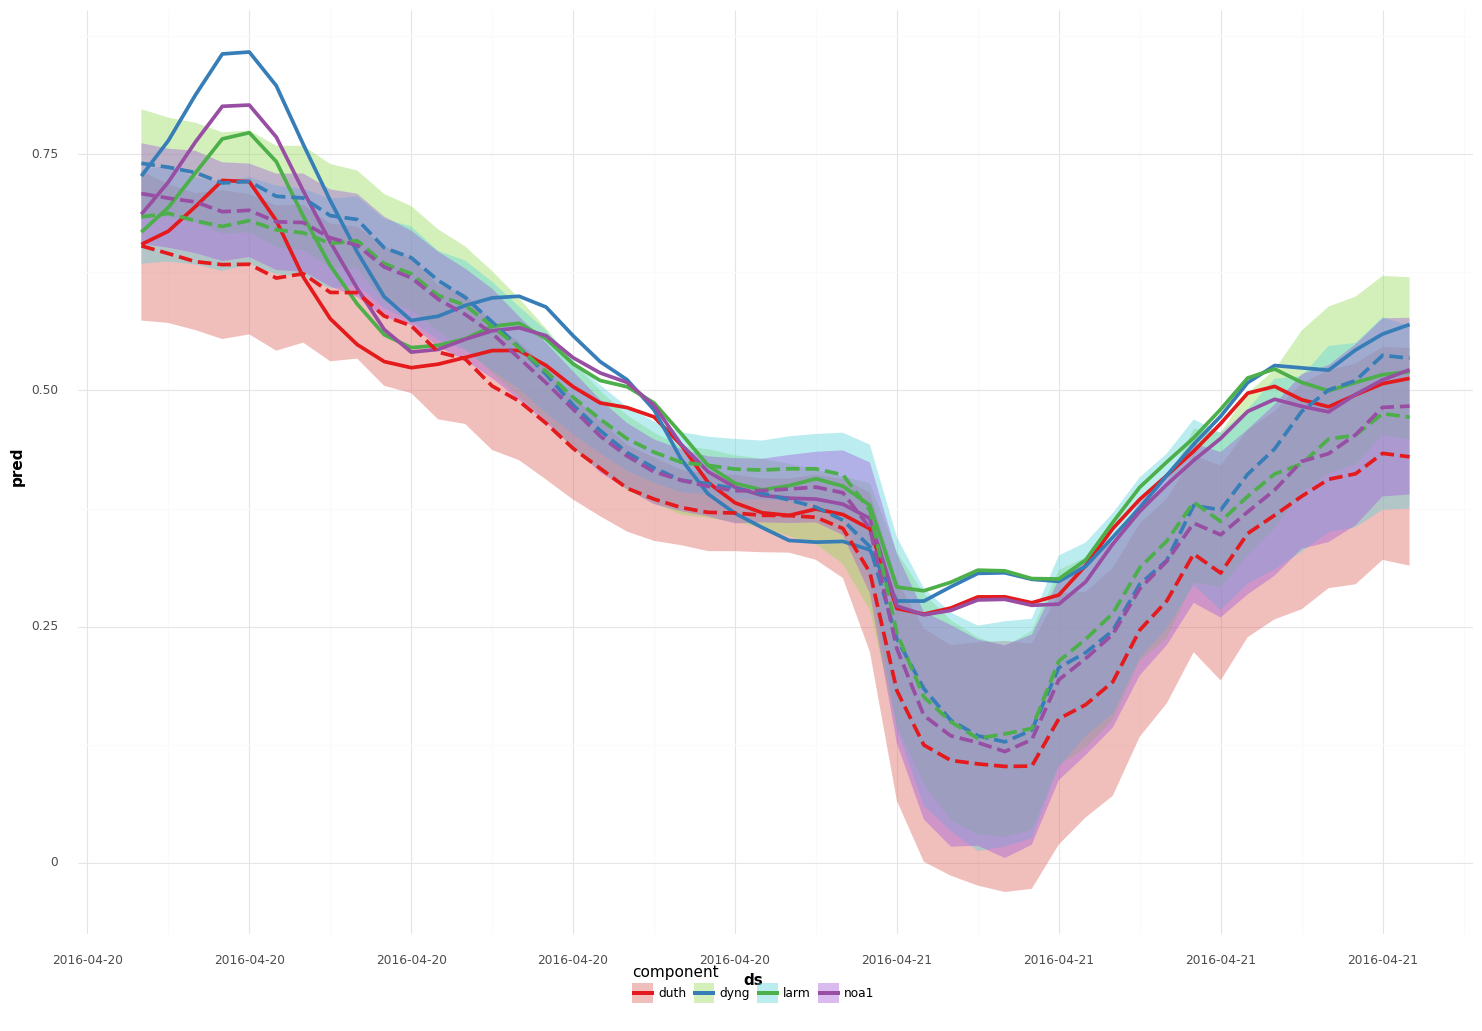

<ggplot: (8777126416725)>

In [131]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme, geom_ribbon,theme_minimal,scale_color_brewer
from plotnine_prism import *
(
    ggplot(second_df.reset_index())  # What data to use
    + aes(x="ds")  # What variable to use
    + geom_ribbon(aes(y = "pred", ymin = "uncer_min", ymax = "uncer_max", fill = "component"), alpha = .4) 
    + geom_line(aes(y="current", color = "component"),size = 1.5)  # Geometric object to use for drawing
    + geom_line(aes(y="pred", color = "component"),linetype="dashed",size = 1.5 )  # Geometric object to use for drawing
    + theme_minimal() 
    +theme(legend_position="bottom", figure_size=(18, 12))
    + scale_color_brewer(type="qual", palette="Set1")
)

In [22]:
current_fcev.save_results(df_fore)

In [23]:
from FCeV import METRICS
current_fcev.get_metrics_from_fc(df_fore["BASE"], METRICS.RMSE).mean().mean()

6.552733

In [24]:
current_fcev.get_metrics_from_fc(df_fore["SYNTH_2"]["8"], METRICS.RMSE).mean().mean()

6.4202304

<AxesSubplot: xlabel='ds'>

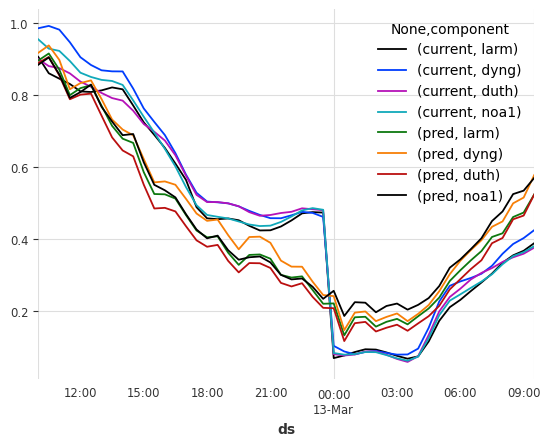

In [27]:
df_fore["BASE"].plot()

<AxesSubplot: xlabel='ds'>

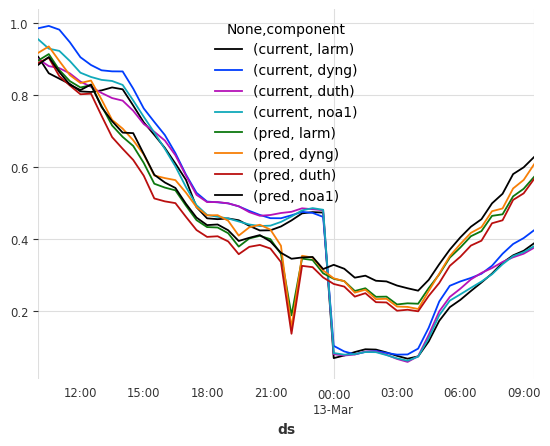

In [29]:
df_fore["SYNTH_5"]["24"].plot()

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [12]:
train_day = dateutil.parser.parse("2018-09-30")
val_day = dateutil.parser.parse("2018-12-31")
series = TimeSeries.from_dataframe(df_ion[df_ion.index < val_day], fill_missing_dates=False, freq=freq)
series = series.astype(np.float32)
filler = MissingValuesFiller()
tec_series = filler.transform(series, method = "from_derivatives")

# Create training and validation sets:
train_tec, val_tec = tec_series.split_after(pd.Timestamp(train_day))

# We'll use the month as a covariate
scaler_tec = Scaler()
train_tec = scaler_tec.fit_transform(train_tec)
val_tec = scaler_tec.transform(val_tec)
tec_series = scaler_tec.transform(tec_series)



NameError: name 'df_ion' is not defined

In [20]:
widths = [4, 4, 3, 3, 6, 6, 6 ,6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 5, 7, 3, 4, 6, 4, 6, 5, 6, 6, 6, 9, 9, 9, 9, 3]
ion_data = pd.read_fwf('/home/carloscano/data/ion/ionosphere_parameters_data.txt', widths = widths, header=None)
id_ion = ["year", "doy", "hour", "id imf", "B scalar", "B vector", "Lat B", "Long B", "BY", "Bz", "SW Plasma Ta", "SW Proton", "SW Plasma Speed", "SW Plasma flow long", "SW Plasma Speed lat", "Alpha ratio", "Flow pressure", "Alfen", "Magneto", "Quasy", "Kp", "N sunspot", "Dst-index", "Ap index", "f107", "AE", "AL", "AU", "pc", "lyman", "Proton10", "Proton30", "Proton60", "Flux" ]
ion_data.columns = id_ion
strfmt = "{year}-{doy:0=3d}T{hour:0=2d}:00:00"

ion_data["datetime"] = ion_data.apply(lambda x: datetime.strptime(strfmt.format(year = int(x["year"]), doy = int(x["doy"]), hour = int(x["hour"])),"%Y-%jT%H:%M:%S"), axis = 1)

ion_data = ion_data.drop(["year", "doy", "hour"], axis = 1).set_index("datetime")

ion_data = ion_data[["Kp", "f107", "N sunspot"]]

In [19]:
df_input

NameError: name 'df_input' is not defined

In [22]:

ion_ts = TimeSeries.from_dataframe(ion_data[ion_data.index < val_day], fill_missing_dates=True, freq = "1H").resample(freq=freq)
ion_ts = ion_ts.astype(np.float32)
scaler_ion = Scaler()
ion_ts = scaler_ion.fit_transform(ion_ts)
# Create training and validation sets:
train_ion, val_ion = ion_ts.split_after(pd.Timestamp(train_day))

In [23]:
my_model_TCN = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=48,
    n_epochs=40,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,
        pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },

)

my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Ion_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)

In [24]:
%%time

my_model_TCN.fit(
    train_tec,
    past_covariates=ion_ts,
    verbose=True,
)

Training: 0it [00:00, ?it/s]

CPU times: user 13min 9s, sys: 12.4 s, total: 13min 22s
Wall time: 12min 8s


Predicting: 0it [00:00, ?it/s]

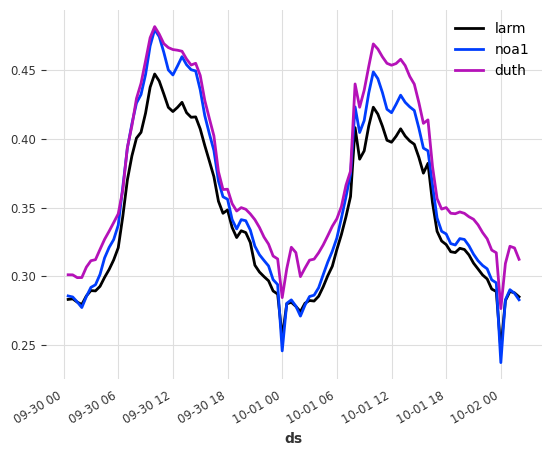

In [26]:
my_model_TCN.predict(100, past_covariates=ion_ts).plot()

In [36]:
my_model_TCN.predict(10)

Predicting: 0it [00:00, ?it/s]

<TimeSeries (DataArray) (ds: 10, component: 3, sample: 1)>
array([[[0.07624771],
        [0.11553447],
        [0.08570881]],

       [[0.0741096 ],
        [0.11285362],
        [0.08169012]],

       [[0.0722303 ],
        [0.11039558],
        [0.08021197]],

       [[0.07266091],
        [0.11098294],
        [0.08123509]],

       [[0.07484796],
        [0.11508684],
        [0.08405249]],

       [[0.0771201 ],
        [0.11776982],
        [0.0878032 ]],

       [[0.07990671],
        [0.1204467 ],
        [0.09080118]],

       [[0.08140471],
        [0.12296784],
        [0.09059939]],

       [[0.08333096],
        [0.12645069],
        [0.09133573]],

       [[0.08479765],
        [0.1287784 ],
        [0.09316227]]], dtype=float32)
Coordinates:
  * ds         (ds) datetime64[ns] 2018-09-30T00:30:00 ... 2018-09-30T05:00:00
  * component  (component) object 'larm' 'noa1' 'duth'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [27]:
from darts.ad import KMeansScorer,ForecastingAnomalyModel
scorer = KMeansScorer(k=5, window=20)

In [28]:
ad_model = ForecastingAnomalyModel(my_model_TCN, scorer)
scorer.fit(train_tec)

In [29]:
#anom_score = ad_model.score(val_tec,    past_covariates=ion_ts)

CPU times: user 1min 57s, sys: 6min 44s, total: 8min 42s
Wall time: 18min 26s


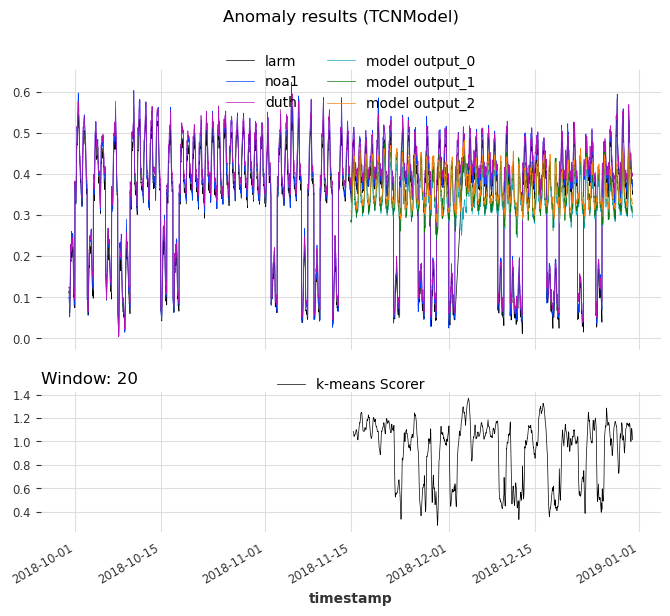

In [30]:
%%time
ad_model.show_anomalies(val_tec,    past_covariates=ion_ts)

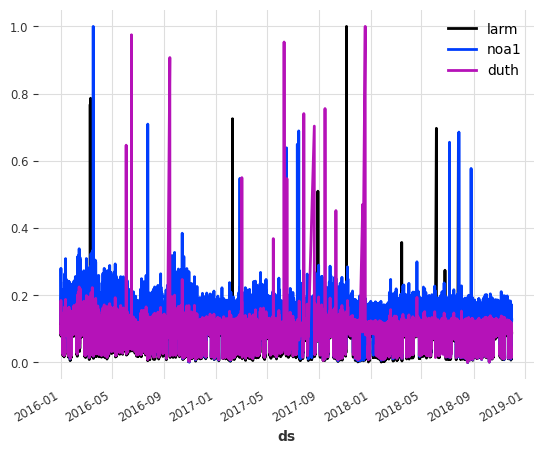

In [40]:
train_tec.plot()

In [38]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train_tec))
binary_anom = detector.detect(anom_score)

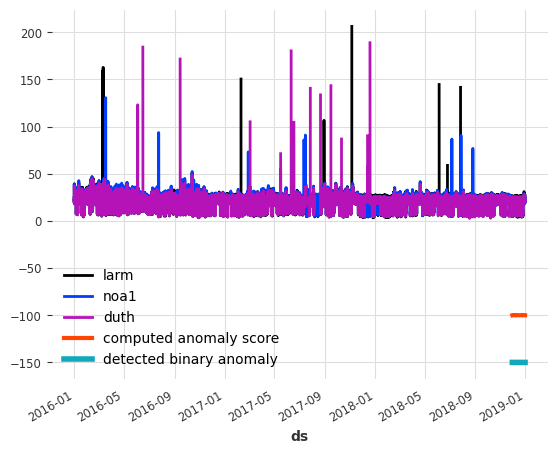

In [39]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [ ]:
# Scale so that the largest value is 1.
# This way of scaling perserves the sMAPE
scaler = Scaler(scaler=MaxAbsScaler())
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

In [ ]:
for i in [10, 50, 100, 150, 250, 350]:
    plt.figure(figsize=(15, 5))
    all_series_fp32[i].plot(label="{}".format(i, lw=1))

In [21]:
from darts.explainability.shap_explainer import ShapExplainer
from darts.models import RegressionModel

In [23]:
model = RegressionModel(lags=24, lags_future_covariates = [24,24], output_chunk_length = 24)
model.fit(train_tec, future_covariates=ion_ts)

## DALEX

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# before starting, we define some constants
num_samples = 200

figsize = (25, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [22]:
# Read data
series = AirPassengersDataset().load()

# we convert monthly number of passengers to average daily number of passengers per month
series = series / TimeSeries.from_series(series.time_index.days_in_month)
series = series.astype(np.float32)

# Create training and validation sets:
training_cutoff = pd.Timestamp("19571201")
train, val = series.split_after(training_cutoff)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [23]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 48 * 5
forecast_horizon = 48
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=1000,
    n_epochs=2,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
            pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)


In [24]:
my_model.fit(train_tec, future_covariates=ion_ts, verbose=True)

Training: 0it [00:00, ?it/s]

In [25]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()


In [ ]:
eval_model(my_model, 48, tec_series, val_ion)

In [ ]:
forecast_horizon = 48
backtest_series = my_model.historical_forecasts(
    series_transformed,
    future_covariates=covariates_transformed,
    start=train.end_time() + train.freq,
    num_samples=num_samples,
    forecast_horizon=forecast_horizon,
    stride=forecast_horizon,
    last_points_only=False,
    retrain=False,
    verbose=True,
)

In [24]:
def eval_backtest(backtest_series, actual_series, horizon, start, transformer):
    plt.figure(figsize=figsize)
    actual_series.plot(label="actual")
    backtest_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    backtest_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)
    plt.legend()
    plt.title(f"Backtest, starting {start}, {horizon}-months horizon")
    print(
        "MAPE: {:.2f}%".format(
            mape(
                transformer.inverse_transform(actual_series),
                transformer.inverse_transform(backtest_series),
            )
        )
    )

MAPE: 5.13%


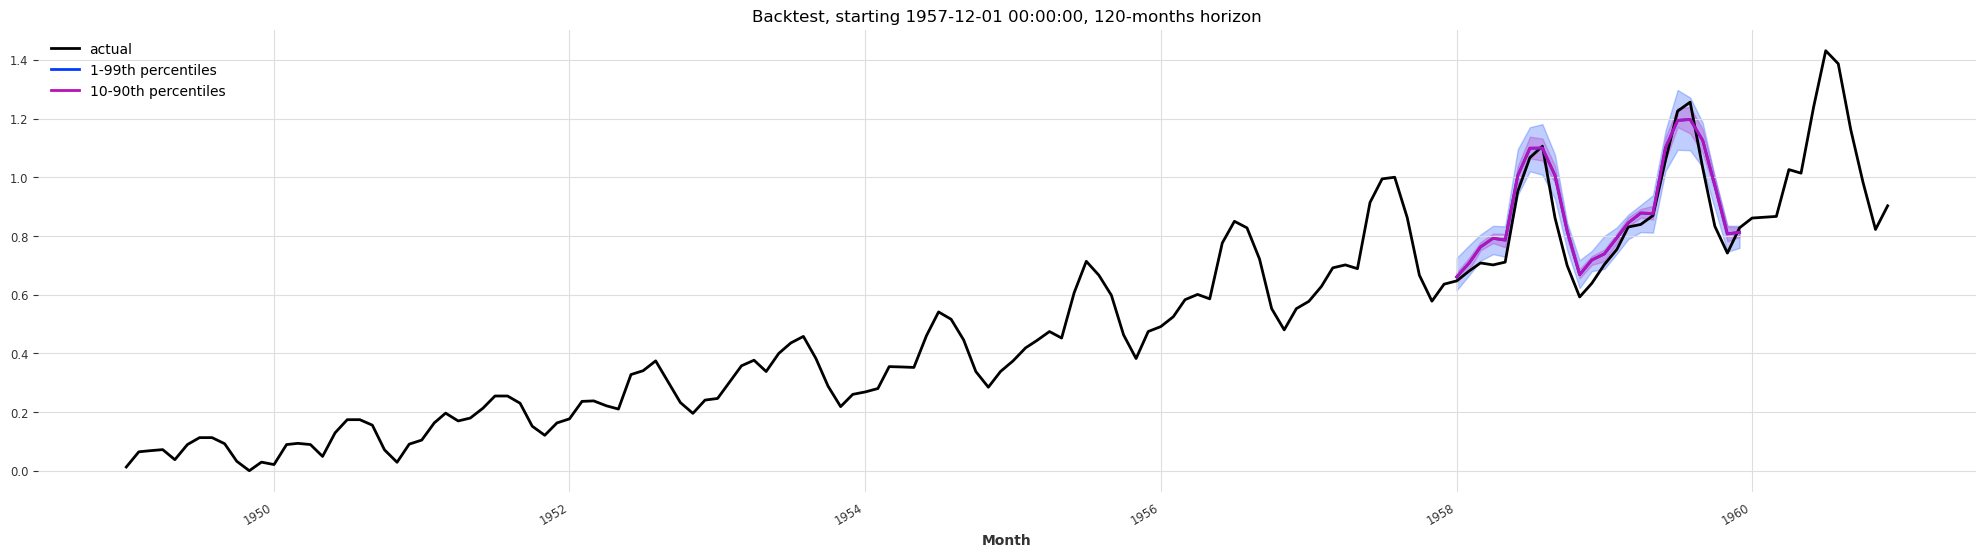

In [27]:
eval_backtest(
    backtest_series=concatenate(backtest_series),
    actual_series=series_transformed,
    horizon=forecast_horizon * 10,
    start=training_cutoff,
    transformer=transformer,
)

In [11]:
my_model = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=24,
    n_epochs=2,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,

)

In [203]:
def retrain_func(pred_time, train_series, past_covariates, future_covariates):
    print(len(past_covariates))
    return True

In [ ]:
backtest = model_air.historical_forecasts(
    series=tec_filled,
    past_covariates=ion_ts,
    start=0.90,
    forecast_horizon=1,
    retrain=False,
    verbose=False,
    last_points_only = False,
)

In [219]:
def plot_backtest(ts_actual, ts_backtest):
    ts_actual[ts_backtest.time_index].plot(label="actual")
    ts_backtest.plot(label="backtest (H=6)")
    plt.legend()


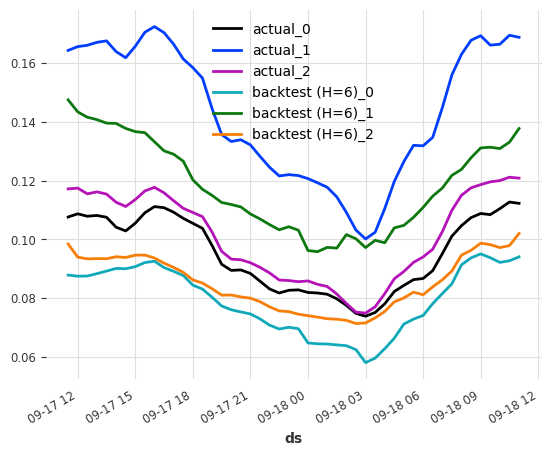

In [223]:
plot_backtest(tec_filled, backtest[5])

In [17]:
len(filled)*0.01

525.6

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel
from darts.metrics import mape
from darts.datasets import AirPassengersDataset

In [5]:
# Read data:
series = AirPassengersDataset().load()
series = series.astype(np.float32)

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("19590101"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [51]:
my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Air_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)
my_model.fit(train_transformed, val_series=val_transformed)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 4.0 M 
4 | V             | Linear           | 2.0 K 
---------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
16.032    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/carloscano/anaconda3/envs/neuralprophet/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

